<a href="https://www.kaggle.com/code/dhruvtiwari/easy-xgboost-model-to-learn-basics?scriptVersionId=132207293" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Easy to understand XGBoost model

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


## Data Preprocessing

In [14]:
X = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')
y = X['Age']
X.drop('Age',inplace=True,axis=1)
test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')

In [15]:
X.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395


In [16]:
X.shape

(74051, 9)

In [17]:
X.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248


In [18]:
X.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

There are no null values which is good. The Id column is useless so drop it

Ordinal Encoder to convert Sex values I,M,F to 0,1,2 which are numerical

In [19]:
from sklearn.preprocessing import OneHotEncoder

Enc = OneHotEncoder()
encx = Enc.fit_transform(X[['Sex']]) 
enct = Enc.transform(test[['Sex']])
X = X.join(pd.DataFrame(encx.toarray()))
test = test.join(pd.DataFrame(enct.toarray())) 

In [20]:
useless_cols = ['id','Sex']
X = X.drop(useless_cols,axis=1)
test_id = test['id']
test = test.drop(useless_cols,axis=1)

In [21]:
X.rename(columns={0: "Female", 1: "Indeterminate", 2 : "Male"}, inplace = True)
test.rename(columns={0: "Female", 1: "Indeterminate", 2 : "Male"}, inplace = True)

# Correlation Plot

<Axes: >

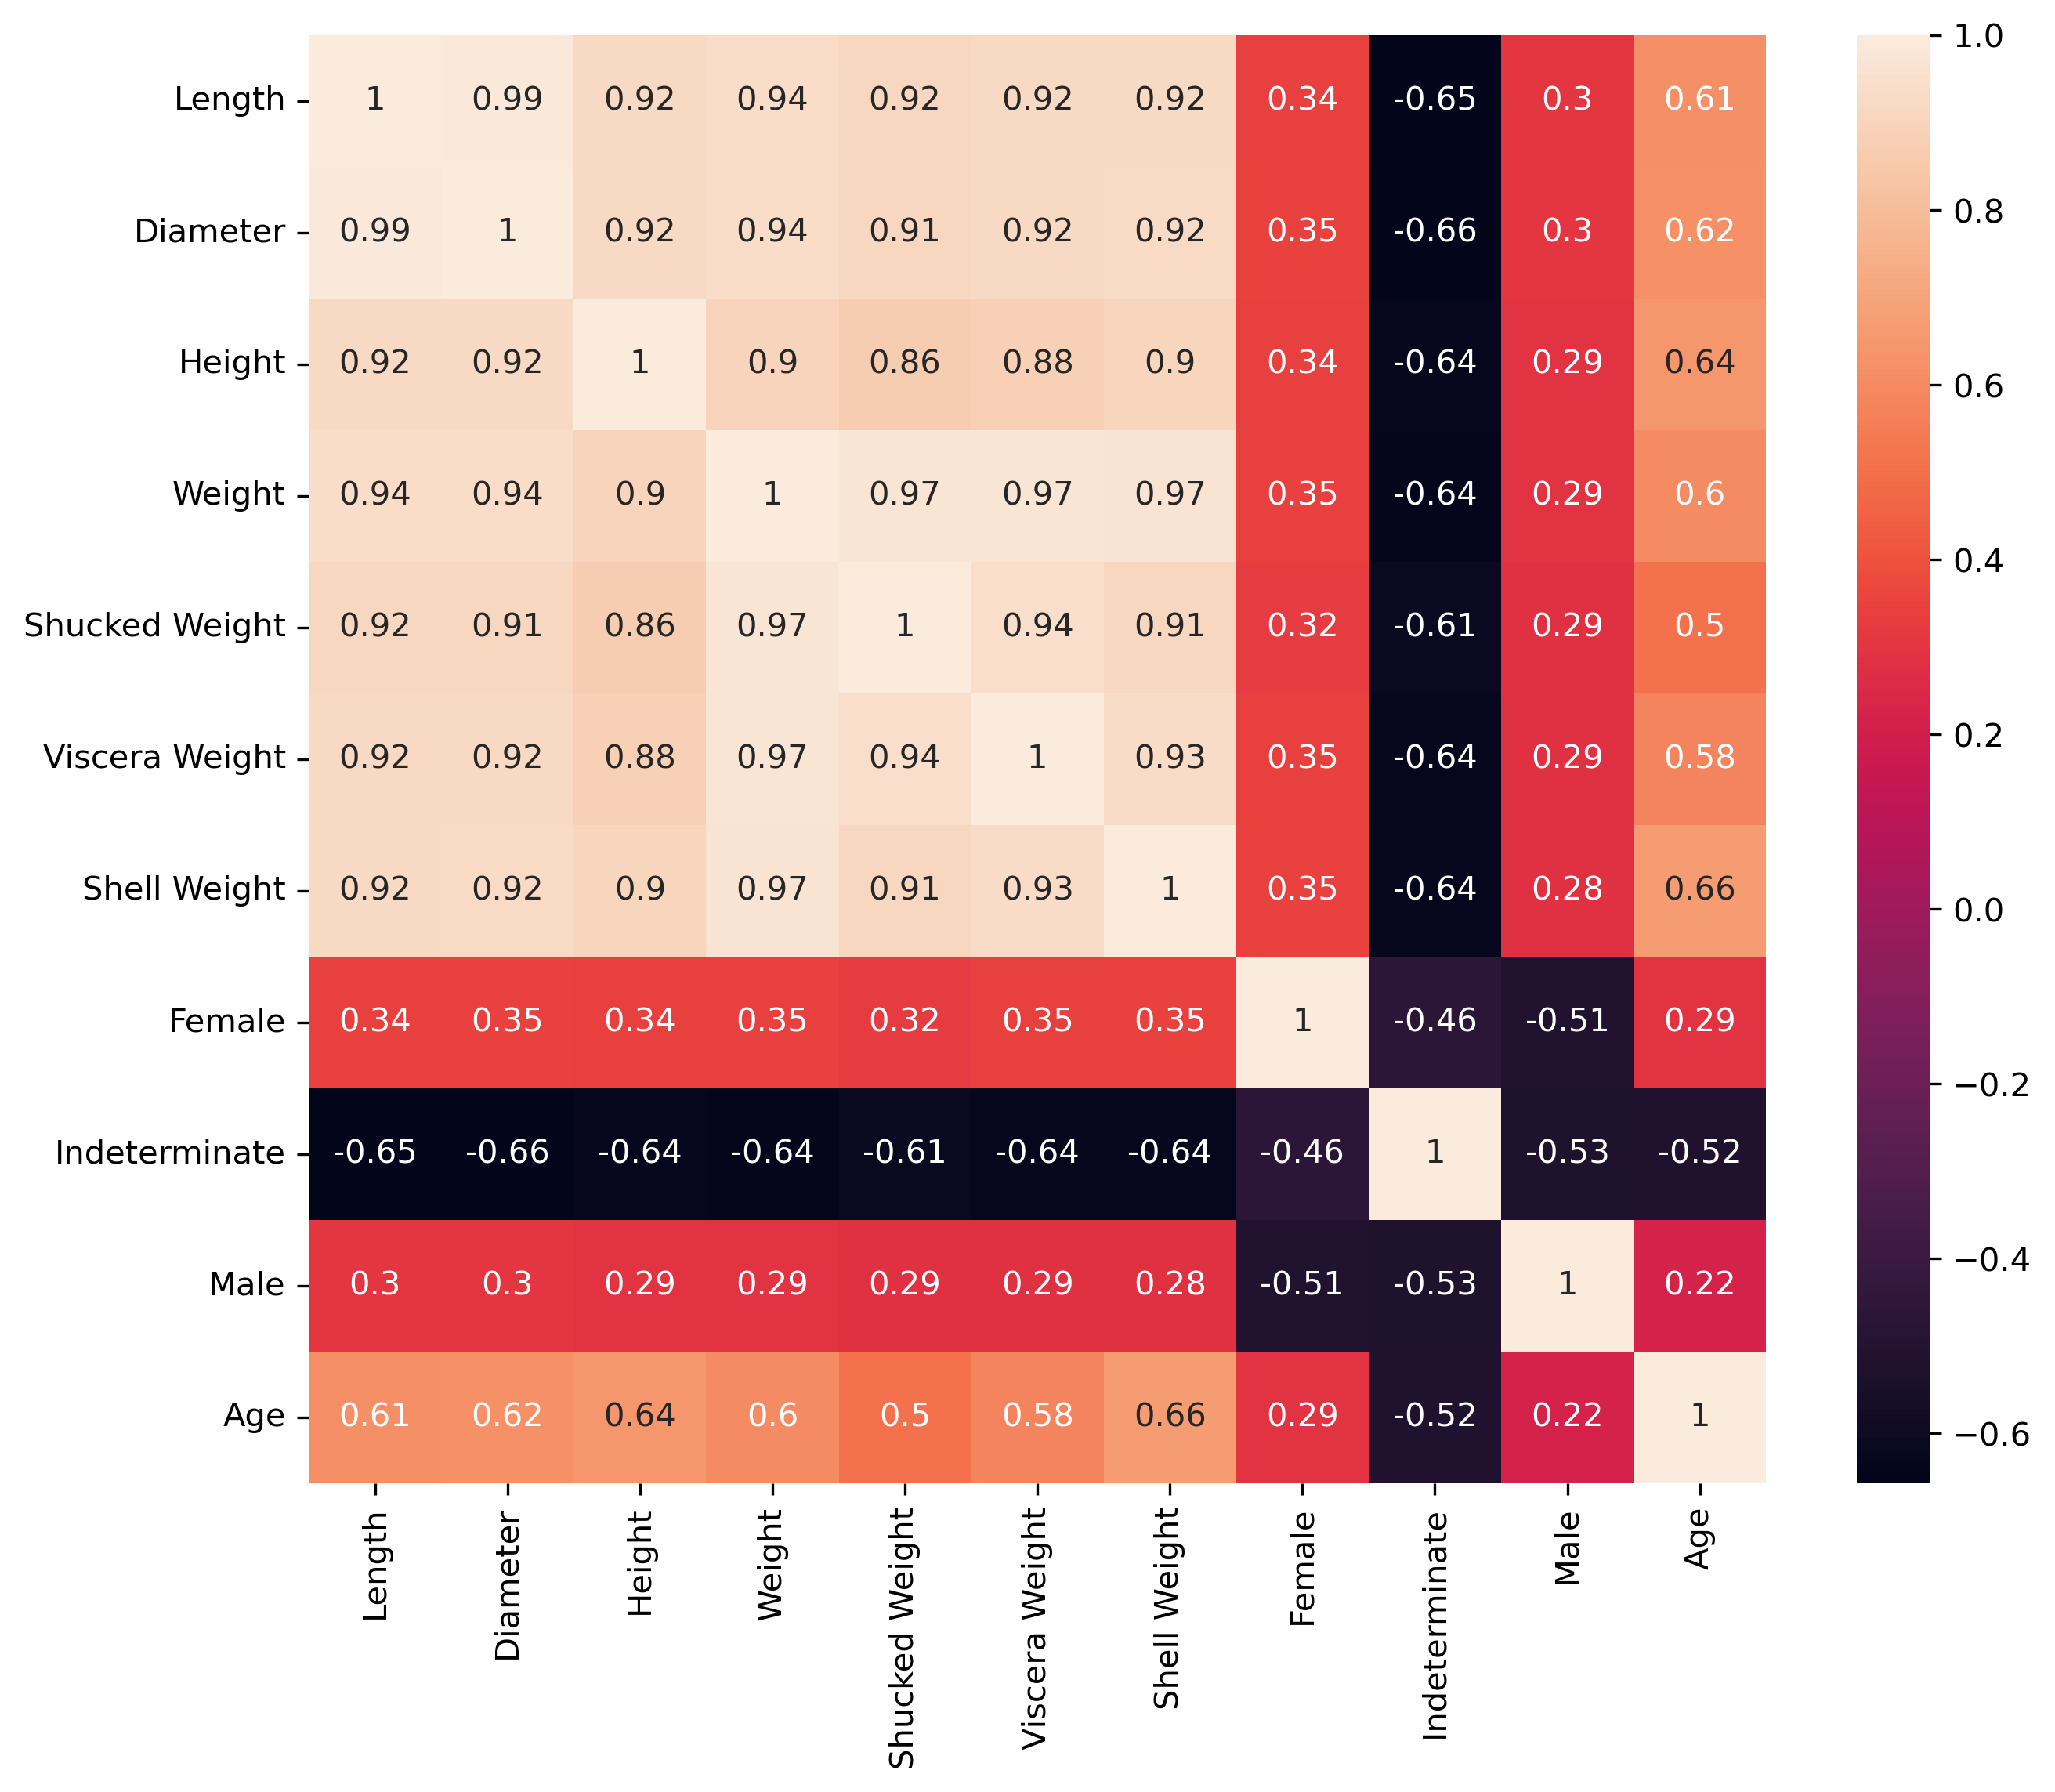

In [22]:
plt.figure(figsize = (10, 8), dpi = 300)
sns.heatmap(pd.concat([X,y],axis=1).corr(),annot=True)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [24]:
X_train

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Female,Indeterminate,Male
43517,1.1250,0.8375,0.3000,12.672227,5.273007,2.324659,3.543687,0.0,1.0,0.0
13764,1.4125,1.0875,0.3750,27.782510,12.332033,4.776891,7.654365,1.0,0.0,0.0
35911,1.5375,1.1750,0.4000,31.949887,14.047177,7.824462,8.363103,0.0,0.0,1.0
3588,0.9625,0.7500,0.2250,8.504850,3.515338,1.133980,2.466407,1.0,0.0,0.0
47093,1.5750,1.2750,0.4000,33.409886,14.727565,6.917278,11.056305,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
26508,1.6500,1.3000,0.5625,41.560367,16.485234,8.845044,11.339800,1.0,0.0,0.0
20118,1.4125,1.0625,0.3625,23.856104,10.035723,5.811648,6.945627,0.0,1.0,0.0
20307,1.4500,1.1375,0.4250,22.693775,9.638830,5.528153,7.087375,1.0,0.0,0.0
44321,1.2500,0.9375,0.3125,16.343487,8.419802,3.798833,4.110678,0.0,1.0,0.0


Training XGBoost model with some normal hyperparameters

In [25]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=2000,learning_rate=0.1,n_jobs=4,max_depth=4,objective='reg:pseudohubererror')
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=4, num_parallel_tree=None,
             objective='reg:pseudohubererror', predictor=None, ...)

In [26]:
predictions = model.predict(X_valid)

Scoring using MAE

In [27]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(predictions,y_valid)
-1*score

-47.48002411730128

Preping the submission DataFrame

In [28]:

preds =pd.DataFrame( model.predict(test),columns=['Age'])

In [29]:
test_id = pd.DataFrame(test_id)

In [32]:
final_df = pd.concat([test_id['id'],preds['Age']],axis=1)

In [33]:
final_df.set_index('id')

,Age
id,
74051,-94.081383
74052,7.551921
74053,9.267570
74054,47.087132
74055,3.317287
...,...
123414,20.330021
123415,7.254025
123416,-427.971741


In [34]:
final_df.to_csv('submission.csv',index=False)